<a href="https://colab.research.google.com/github/rakeshpuppala2590/Market-Anomaly-Detection/blob/main/MAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('/content/FinancialMarketData.csv')

In [14]:
df.head()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [15]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Y          1111 non-null   int64  
 1   Data       1111 non-null   object 
 2   XAU BGNL   1111 non-null   float64
 3   ECSURPUS   1111 non-null   float64
 4   BDIY       1111 non-null   float64
 5   CRY        1111 non-null   float64
 6   DXY        1111 non-null   float64
 7   JPY        1111 non-null   float64
 8   GBP        1111 non-null   float64
 9   Cl1        1111 non-null   float64
 10  VIX        1111 non-null   float64
 11  USGG30YR   1111 non-null   float64
 12  GT10       1111 non-null   float64
 13  USGG2YR    1111 non-null   float64
 14  USGG3M     1111 non-null   float64
 15  US0001M    1111 non-null   float64
 16  GTDEM30Y   1111 non-null   float64
 17  GTDEM10Y   1111 non-null   float64
 18  GTDEM2Y    1111 non-null   float64
 19  EONIA      1111 non-null   float6

In [17]:
df = df.dropna()

In [16]:
df.describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,...,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,...,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,...,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,...,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,...,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,...,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


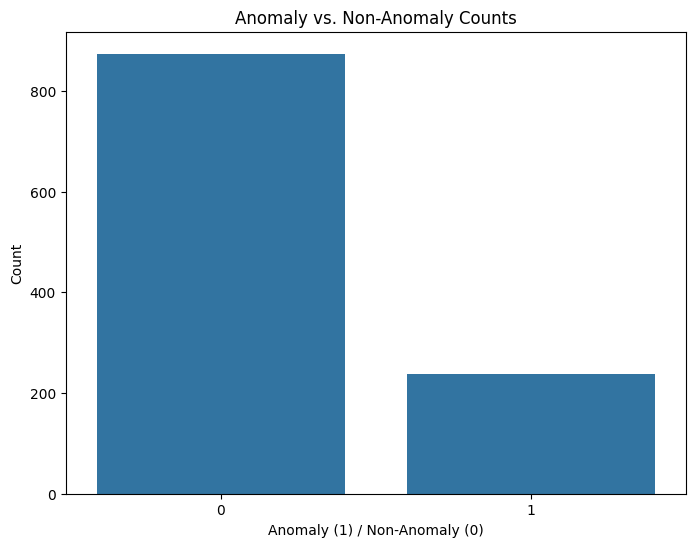

In [19]:
anomaly_counts = df['Y'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=anomaly_counts.index, y=anomaly_counts.values)
plt.title('Anomaly vs. Non-Anomaly Counts')
plt.xlabel('Anomaly (1) / Non-Anomaly (0)')
plt.ylabel('Count')
plt.show()

**Correlation analysis**

In [24]:
numeric_columns = df.select_dtypes(include=[np.number])
numeric_columns.corr()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
Y,1.000000,-0.011535,-0.090772,-0.083440,-0.074102,0.103227,-0.151197,-0.093201,-0.070141,0.598432,...,-0.209774,-0.169475,-0.156550,-0.193928,-0.253877,-0.279399,-0.043429,-0.148848,-0.188942,-0.149581
XAU BGNL,-0.011535,1.000000,0.114798,-0.315007,0.015316,-0.428891,-0.576191,-0.422084,0.515215,-0.075873,...,0.817990,0.891486,0.925465,0.625814,0.176177,0.036654,0.581667,0.339929,0.831756,0.829659
ECSURPUS,-0.090772,0.114798,1.000000,-0.102022,-0.139779,0.074835,-0.070422,-0.188233,-0.016245,-0.094127,...,0.115747,0.110335,0.073268,0.192180,0.014535,0.034829,-0.014098,-0.077750,0.102198,0.115145
BDIY,-0.083440,-0.315007,-0.102022,1.000000,0.596182,-0.441793,0.062822,0.756718,0.286396,-0.045367,...,-0.410941,-0.350372,-0.241704,-0.300277,-0.058349,0.103124,0.337489,0.606526,-0.240799,-0.033084
CRY,-0.074102,0.015316,-0.139779,0.596182,1.000000,-0.798564,-0.412364,0.793954,0.785614,-0.190060,...,-0.315491,-0.218547,-0.045101,-0.458623,-0.261605,-0.235202,0.641511,0.761661,-0.210901,-0.031605
DXY,0.103227,-0.428891,0.074835,-0.441793,-0.798564,1.000000,0.650429,-0.544966,-0.816378,0.115712,...,-0.074069,-0.201703,-0.386866,0.144988,0.300674,0.247446,-0.776353,-0.756141,-0.188670,-0.352379
JPY,-0.151197,-0.576191,-0.070422,0.062822,-0.412364,0.650429,1.000000,-0.008633,-0.608209,-0.134791,...,-0.113902,-0.225936,-0.330176,0.115772,0.392934,0.557078,-0.639573,-0.306819,-0.149469,-0.269353
GBP,-0.093201,-0.422084,-0.188233,0.756718,0.793954,-0.544966,-0.008633,1.000000,0.352787,-0.124496,...,-0.598572,-0.549016,-0.402361,-0.594595,-0.246342,-0.113736,0.224720,0.530964,-0.501925,-0.329350
Cl1,-0.070141,0.515215,-0.016245,0.286396,0.785614,-0.816378,-0.608209,0.352787,1.000000,-0.213999,...,0.196312,0.292426,0.438823,-0.029697,-0.062125,-0.160278,0.861036,0.759998,0.284056,0.430908
VIX,0.598432,-0.075873,-0.094127,-0.045367,-0.190060,0.115712,-0.134791,-0.124496,-0.213999,1.000000,...,-0.310635,-0.253247,-0.227376,-0.239029,-0.421996,-0.367709,-0.098962,-0.247953,-0.243126,-0.164591


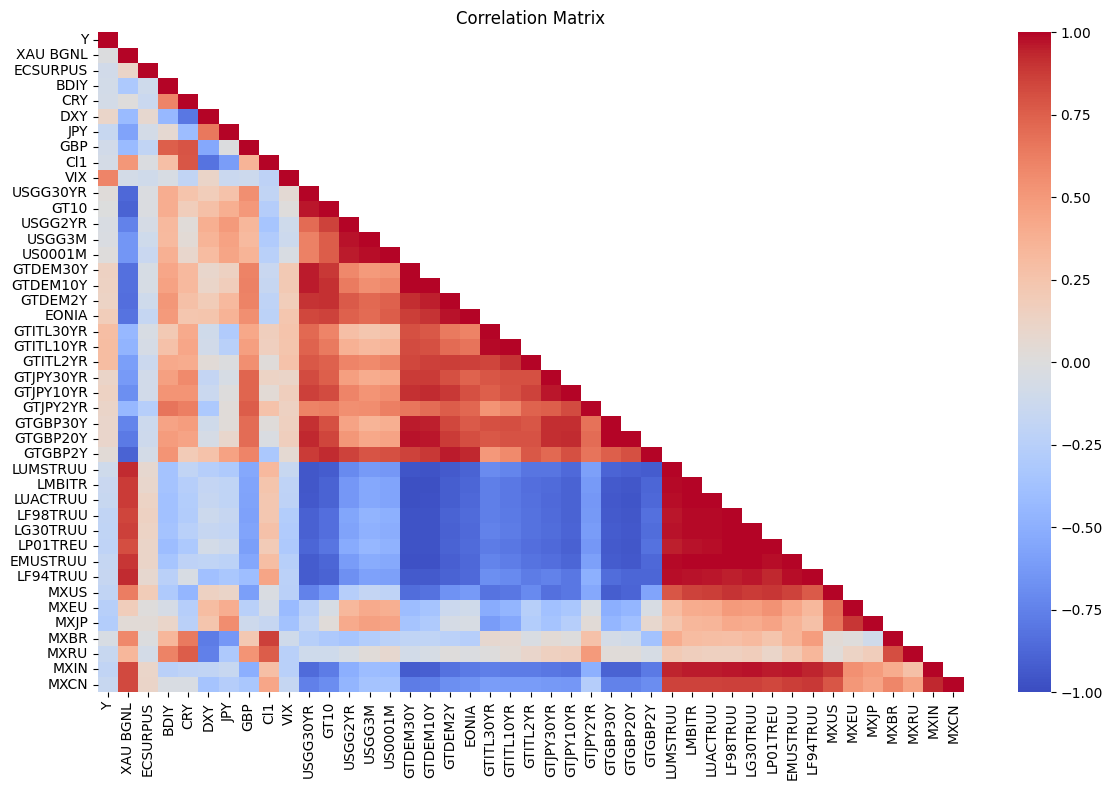

In [28]:
corr_matrix = numeric_columns.corr()
upper_triangle = np.triu(corr_matrix)
mask = np.triu(np.ones_like(corr_matrix), k=1)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, mask=mask, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


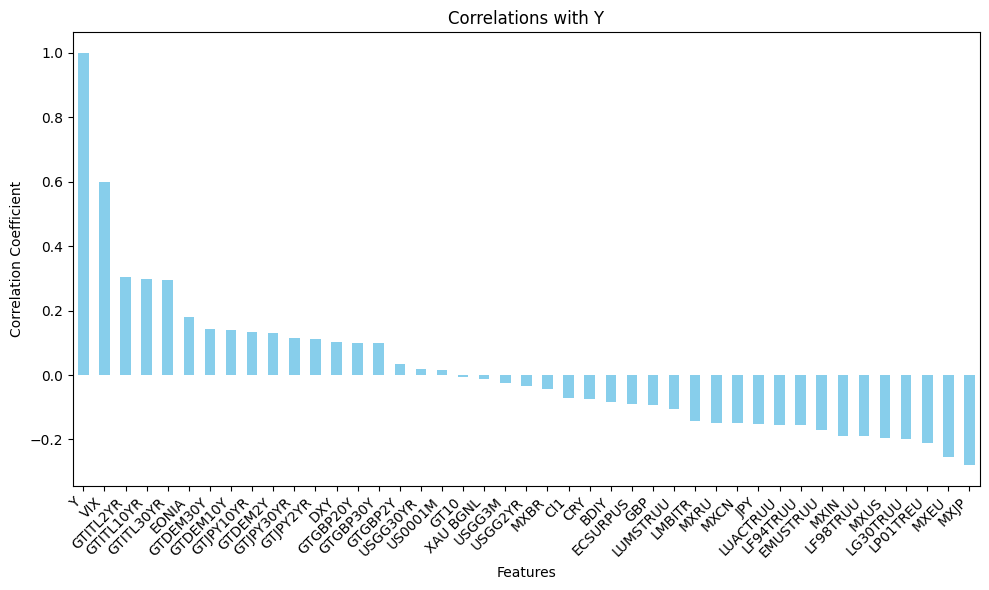

In [30]:
correlations = numeric_columns.corr()['Y'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='skyblue')
plt.title('Correlations with Y')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [32]:
cols_to_plot = ['VIX', 'GTITL2YR', 'JPY' , 'MXJP' ]

<Figure size 2000x600 with 0 Axes>

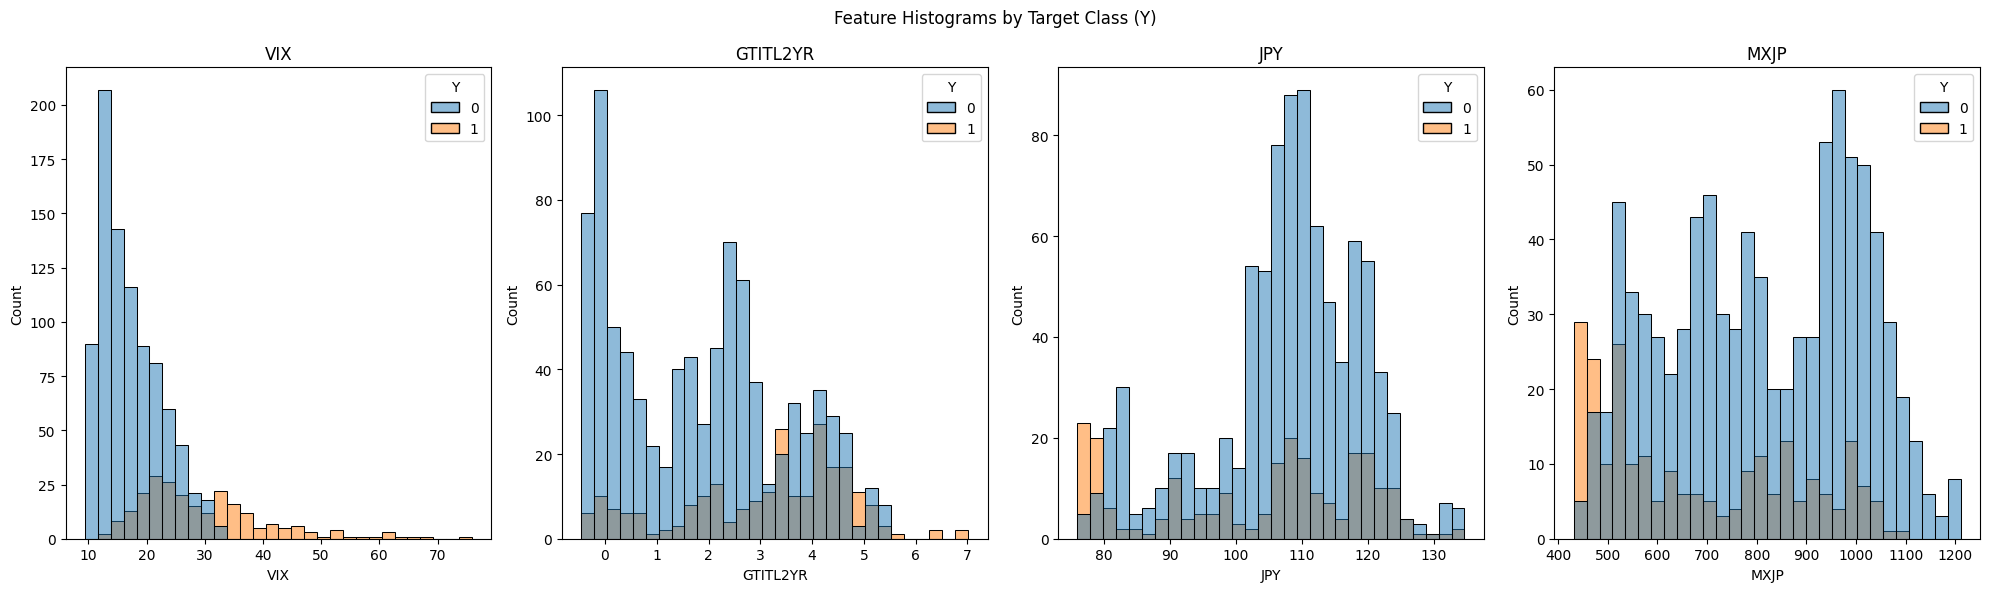

In [34]:
plt.figure(figsize=(20, 6))
fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle('Feature Histograms by Target Class (Y)')

for i, col in enumerate(cols_to_plot):
    sns.histplot(
        data=df,
        x=col,
        hue='Y',
        ax=axes[i],
        multiple="layer",
        alpha=0.5,
        bins=30
    )
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


<Figure size 2000x600 with 0 Axes>

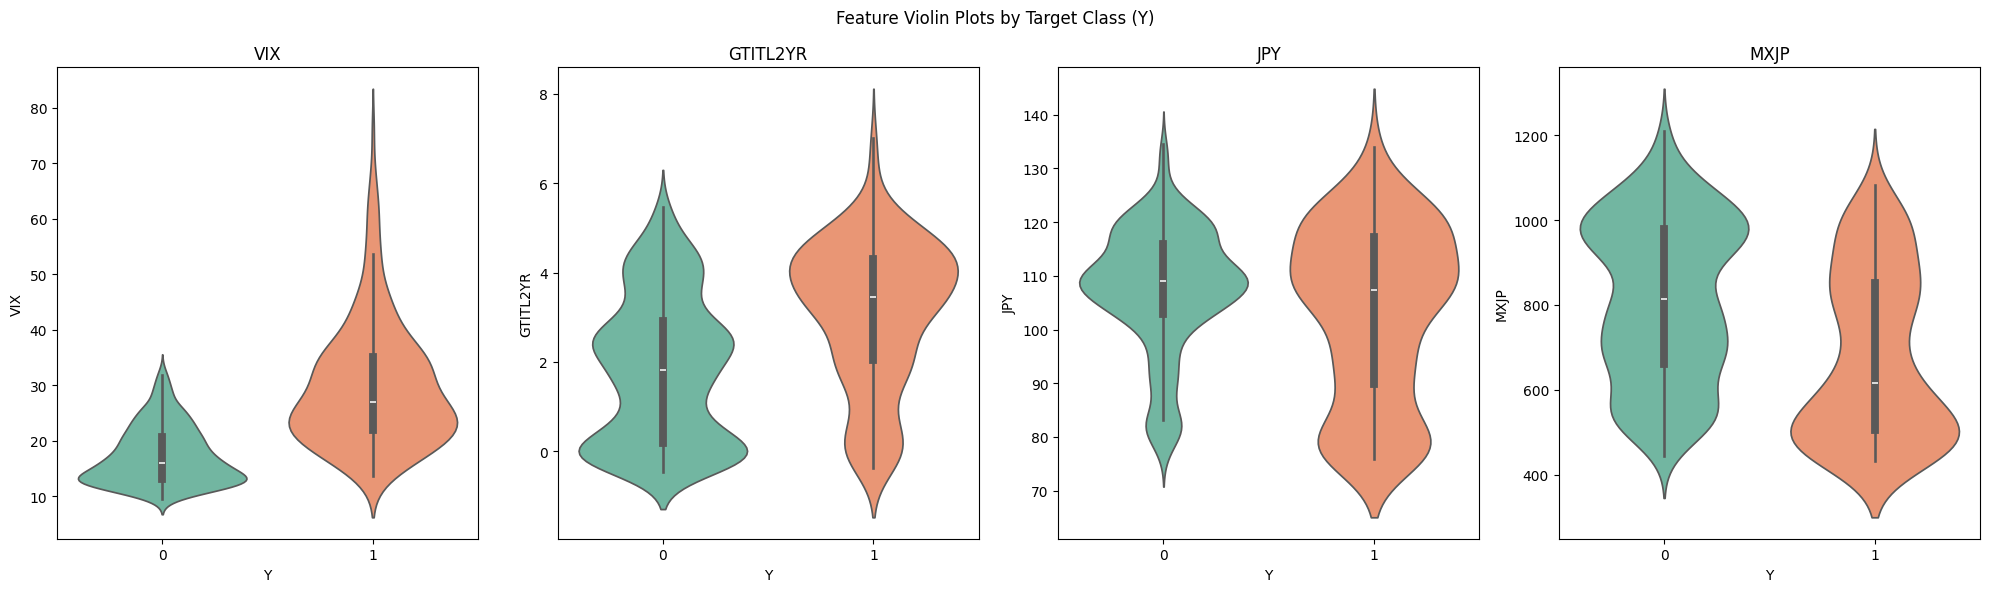

In [36]:
plt.figure(figsize=(20, 6))
fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle('Feature Violin Plots by Target Class (Y)')

for i, col in enumerate(cols_to_plot):
    sns.violinplot(
        data=df,
        x='Y',
        y=col,
        ax=axes[i],
        palette="Set2",
        scale="width"
    )
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [78]:
X = df[['VIX', 'GTITL2YR', 'JPY' , 'MXJP']  ]
y = df['Y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression(random_state=42, max_iter=1200, C=0.4, class_weight="balanced", solver="lbfgs")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nModel Coefficients:")
print(f"VIX coeff: {model.coef_[0][0]:.4f}")
print(f"GTITL2YR coeff: {model.coef_[0][1]:.4f}")
print(f"JPY coeff: {model.coef_[0][2]:.4f}")
print(f"MXJP coeff: {model.coef_[0][3]:.4f}")

Confusion Matrix:
[[137  40]
 [  9  37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       177
           1       0.48      0.80      0.60        46

    accuracy                           0.78       223
   macro avg       0.71      0.79      0.72       223
weighted avg       0.84      0.78      0.80       223


Model Coefficients:
VIX coeff: 1.9249
GTITL2YR coeff: 0.6284
JPY coeff: -0.3525
MXJP coeff: 0.0673


In [45]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print("Random Forest Classifier Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

feature_importances = rf_classifier.feature_importances_
feature_names = ['VIX', 'GTITL2YR', 'JPY', 'MXJP']

for i, importance in enumerate(feature_importances):
    print(f"Feature {feature_names[i]}: {importance:.4f}")

Random Forest Classifier Results:
Confusion Matrix:
[[168   9]
 [ 18  28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       177
           1       0.76      0.61      0.67        46

    accuracy                           0.88       223
   macro avg       0.83      0.78      0.80       223
weighted avg       0.87      0.88      0.87       223

Accuracy Score: 0.8789237668161435
Feature VIX: 0.4533
Feature GTITL2YR: 0.1984
Feature JPY: 0.1705
Feature MXJP: 0.1778


In [71]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
import numpy as np

X = df[['VIX','DXY']]

iso_forest = IsolationForest(
    n_estimators=1000,  # Number of trees
    contamination=0.20,  # Expected proportion of outliers
    random_state=42,
    n_jobs=-1,  # Use all CPU cores
    warm_start=True
)

# Fit and predict
# predict() returns 1 for inliers, -1 for outliers
predictions = iso_forest.fit_predict(X)

# Convert predictions to binary format (0 for normal, 1 for outliers)
# This makes it consistent with your original labels
y_pred = np.where(predictions == -1, 1, 0)

# Print classification report
print("Classification Report:")
print(classification_report(y, y_pred))

# Calculate and print anomaly scores
anomaly_scores = iso_forest.score_samples(X)
print("\nAnomaly Score Statistics:")
print(f"Mean score: {np.mean(anomaly_scores):.4f}")
print(f"Min score: {np.min(anomaly_scores):.4f}")
print(f"Max score: {np.max(anomaly_scores):.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       874
           1       0.57      0.54      0.55       237

    accuracy                           0.82      1111
   macro avg       0.72      0.71      0.72      1111
weighted avg       0.81      0.82      0.81      1111


Anomaly Score Statistics:
Mean score: -0.4720
Min score: -0.7484
Max score: -0.4180


Decision Tree Classifier Results:
Confusion Matrix:
[[175   2]
 [ 26  20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       177
           1       0.91      0.43      0.59        46

    accuracy                           0.87       223
   macro avg       0.89      0.71      0.76       223
weighted avg       0.88      0.87      0.86       223

Accuracy Score: 0.8744


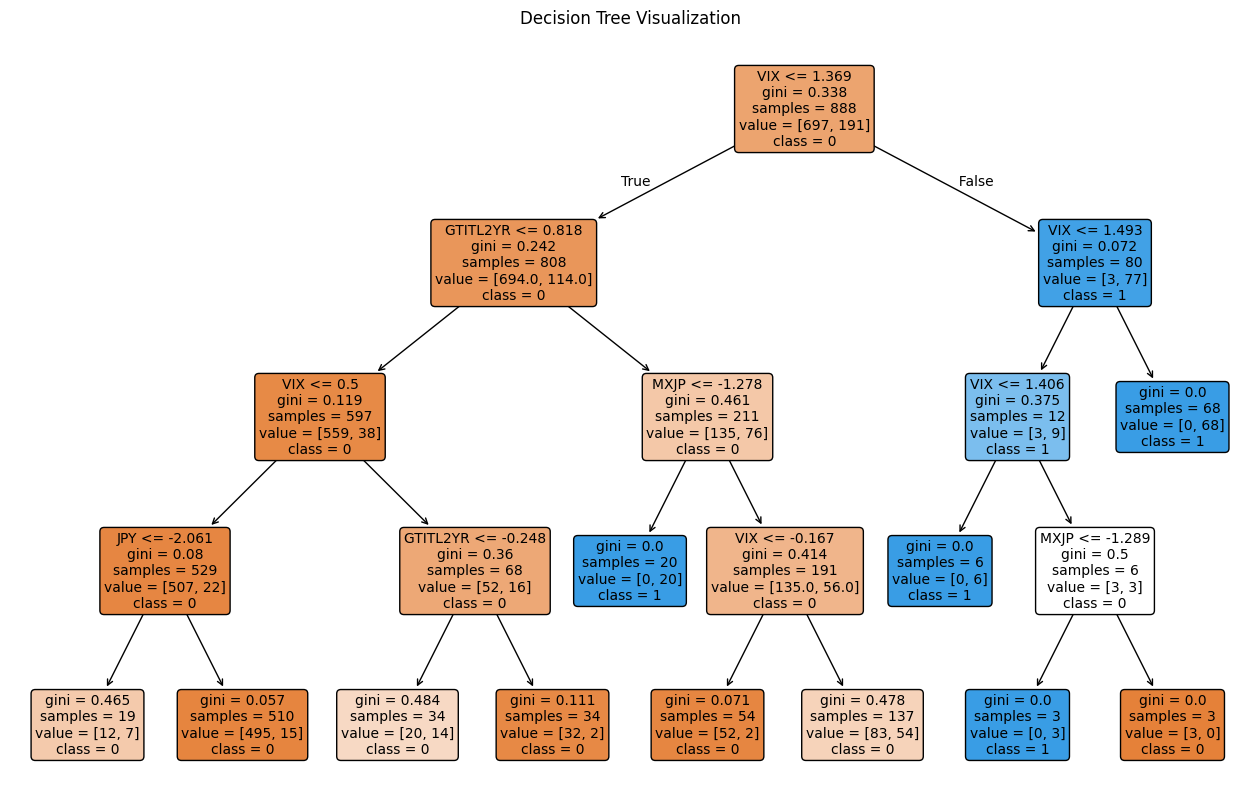

Index(['Y', 'Data', 'XAU BGNL', 'ECSURPUS', 'BDIY', 'CRY', 'DXY', 'JPY', 'GBP',
       'Cl1', 'VIX', 'USGG30YR', 'GT10', 'USGG2YR', 'USGG3M', 'US0001M',
       'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'EONIA', 'GTITL30YR', 'GTITL10YR',
       'GTITL2YR', 'GTJPY30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTGBP30Y',
       'GTGBP20Y', 'GTGBP2Y', 'LUMSTRUU', 'LMBITR', 'LUACTRUU', 'LF98TRUU',
       'LG30TRUU', 'LP01TREU', 'EMUSTRUU', 'LF94TRUU', 'MXUS', 'MXEU', 'MXJP',
       'MXBR', 'MXRU', 'MXIN', 'MXCN'],
      dtype='object')


In [81]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

# Print Decision Tree Classifier Results
print("Decision Tree Classifier Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")

# Update feature names to match those used in the model
plt.figure(figsize=(16, 10))
plot_tree(
    dt_classifier,
    feature_names=['VIX', 'GTITL2YR', 'JPY', 'MXJP'],  # Use correct feature names
    class_names=['0', '1'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

# Check column names used in the original DataFrame
print(df.columns)  # To confirm the feature columns used for training


In [82]:
def create_financial_time_split(df, train_years=4, validation_weeks=52, test_weeks=52):
    """
    Specialized split for financial time series

    Args:
        df: DataFrame with weekly data
        train_years: Number of years for training (default 3 years)
        validation_weeks: Weeks for validation (default 26 weeks = 6 months)
        test_weeks: Weeks for testing (default 26 weeks = 6 months)
    """
    # Convert date column to datetime if not already
    df['Data'] = pd.to_datetime(df['Data'])
    df = df.sort_values('Data')

    # Calculate sizes
    train_size = train_years * 52  # 52 weeks per year
    total_required_size = train_size + validation_weeks + test_weeks

    if len(df) < total_required_size:
        raise ValueError("Not enough data for specified split sizes")

    train_end = train_size
    val_end = train_end + validation_weeks

    train_data = df.iloc[:train_end]
    validation_data = df.iloc[train_end:val_end]
    test_data = df.iloc[val_end:val_end + test_weeks]

    # Verify splits
    print(f"Training period: {train_data['Data'].min()} to {train_data['Data'].max()}")
    print(f"Validation period: {validation_data['Data'].min()} to {validation_data['Data'].max()}")
    print(f"Testing period: {test_data['Data'].min()} to {test_data['Data'].max()}")

    return train_data, validation_data, test_data

In [84]:
train_data, validation_data, test_data = create_financial_time_split(df)

Training period: 2000-01-11 00:00:00 to 2003-12-30 00:00:00
Validation period: 2004-01-06 00:00:00 to 2004-12-28 00:00:00
Testing period: 2005-01-04 00:00:00 to 2005-12-27 00:00:00
